In [1]:
import matplotlib.pyplot as plt
from skimage import feature
import numpy as np
import cv2

In [2]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

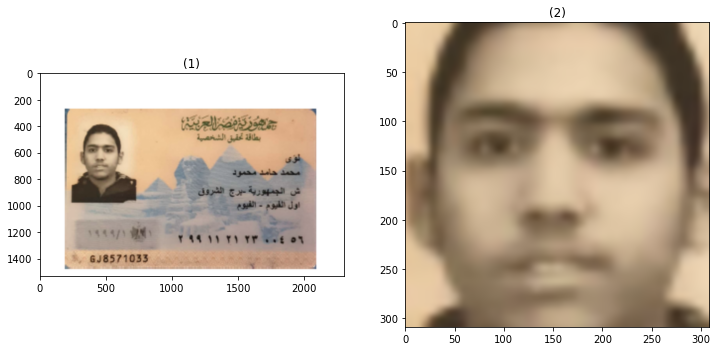

In [3]:
TestDir = "C:\\Collage\\GP\\test\\"
#load image
far_face_image = cv2.imread(TestDir+"Loay Mohamed - ID.png")

# detect there faces
from Emotions_Detection.Models.face_detection import get_faces_from_image

faces = get_faces_from_image(far_face_image, is_dir=False, is_gray=False)
far_face = None
for face in faces:
    far_face = far_face_image[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
show_images([far_face_image,far_face])

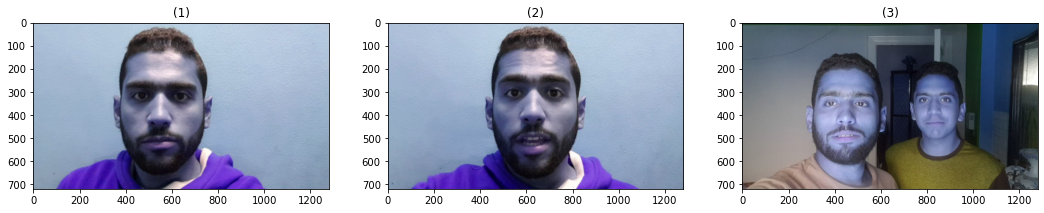

In [36]:
TestDir = "C:\\Collage\\GP\\test\\"
cap = cv2.VideoCapture(TestDir+"no_speak.mp4")
success, img1 = cap.read()
#release cap
cap.release

cap = cv2.VideoCapture(TestDir+"speaking.mp4")
success, img2 = cap.read()
#release cap
cap.release

cap = cv2.VideoCapture(TestDir+"modhek.mp4")
success, img3 = cap.read()
#release cap
cap.release
show_images([img1, img2, img3])

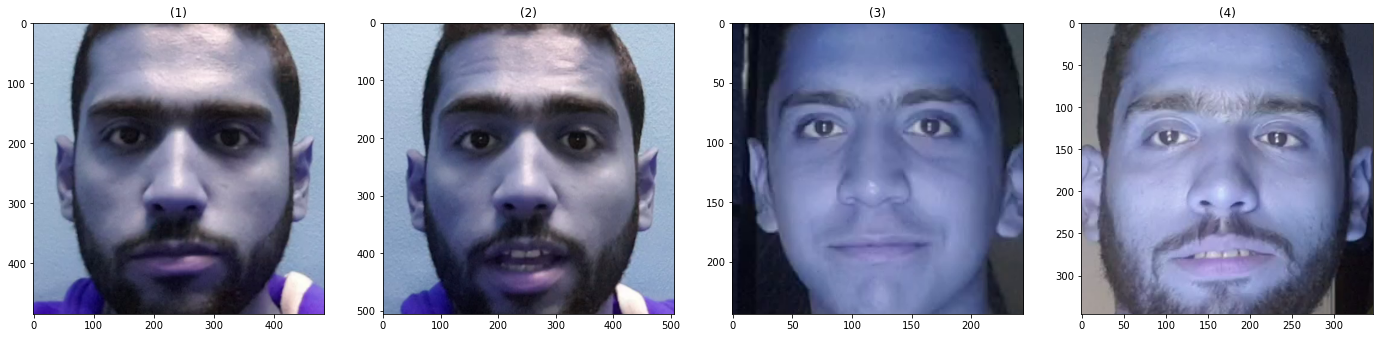

In [42]:
# detect there faces
from Emotions_Detection.Models.face_detection import get_faces_from_image

faces = get_faces_from_image(img1, is_dir=False, is_gray=False)
face1 = None
for face in faces:
    face1 = img1[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(img2, is_dir=False, is_gray=False)
face2 = None
for face in faces:
    face2 = img2[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(img3, is_dir=False, is_gray=False)
face3 = None
face4 = None
face= faces[0]
face3 = img3[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

face= faces[1]
face4 = img3[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

show_images([face1, face2, face3, face4])


## LBP (Local Binary Patterns)

In [38]:
class LocalBinaryPatterns:
  def __init__(self , numPoints , radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self , image , eps=1e-7):
    lbp = feature.local_binary_pattern(image , self.numPoints , self.radius)
    hist = plt.hist(lbp.ravel())
    return lbp , hist

In [39]:
desc = LocalBinaryPatterns(8 , 2)

In [43]:
def preprocess_img(face_img):
  face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
  lbp , hist = desc.describe(face)
  return lbp , hist

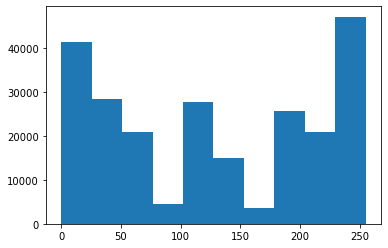

In [52]:
lbp1 , hist1 = preprocess_img(face1)

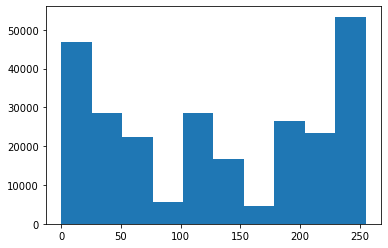

In [53]:
lbp2 , hist2 = preprocess_img(face2)

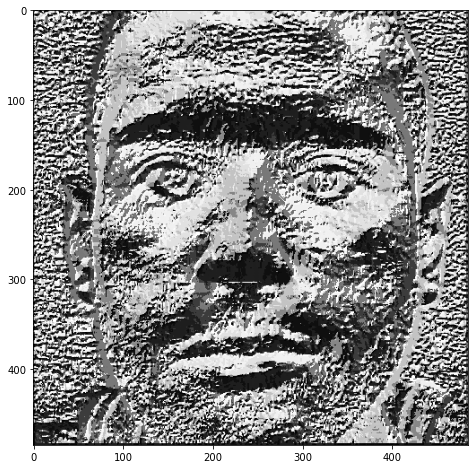

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(lbp1 , cmap="gray")

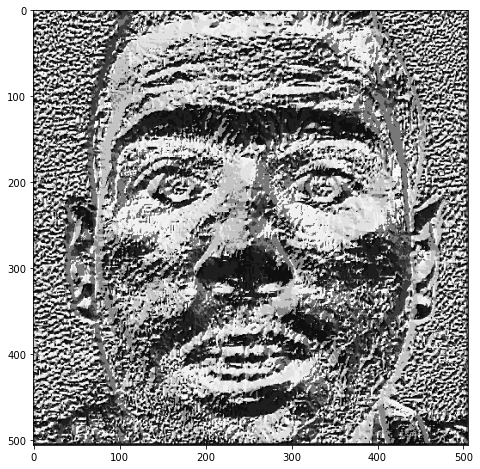

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(lbp2 , cmap="gray")

LBP algorithm, instead of looking into the entire image, it first divide the whole image into a SxS grid. Then this algorithm convert each grid into the LBP format and obtain the intensity distribution of that particular grid. After doing this process, this model produces S^2 histogram. After doing that, the model concatnate all of the produced histograms. Then we perform chi-2 distance to find if face now is the same as the previous face.

XXX lpb didn't work well ...... think of a way to resize images -> crop with the larger one

OR for me the best thing is to find a feature extractor that always extract a fixed size whatever the input image size

## Eigenfaces